In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e12/sample_submission.csv
/kaggle/input/playground-series-s5e12/train.csv
/kaggle/input/playground-series-s5e12/test.csv


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [5]:
train = pd.read_csv("/kaggle/input/playground-series-s5e12/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e12/test.csv")
sample = pd.read_csv("/kaggle/input/playground-series-s5e12/sample_submission.csv")

train.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [6]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.isna().sum()

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


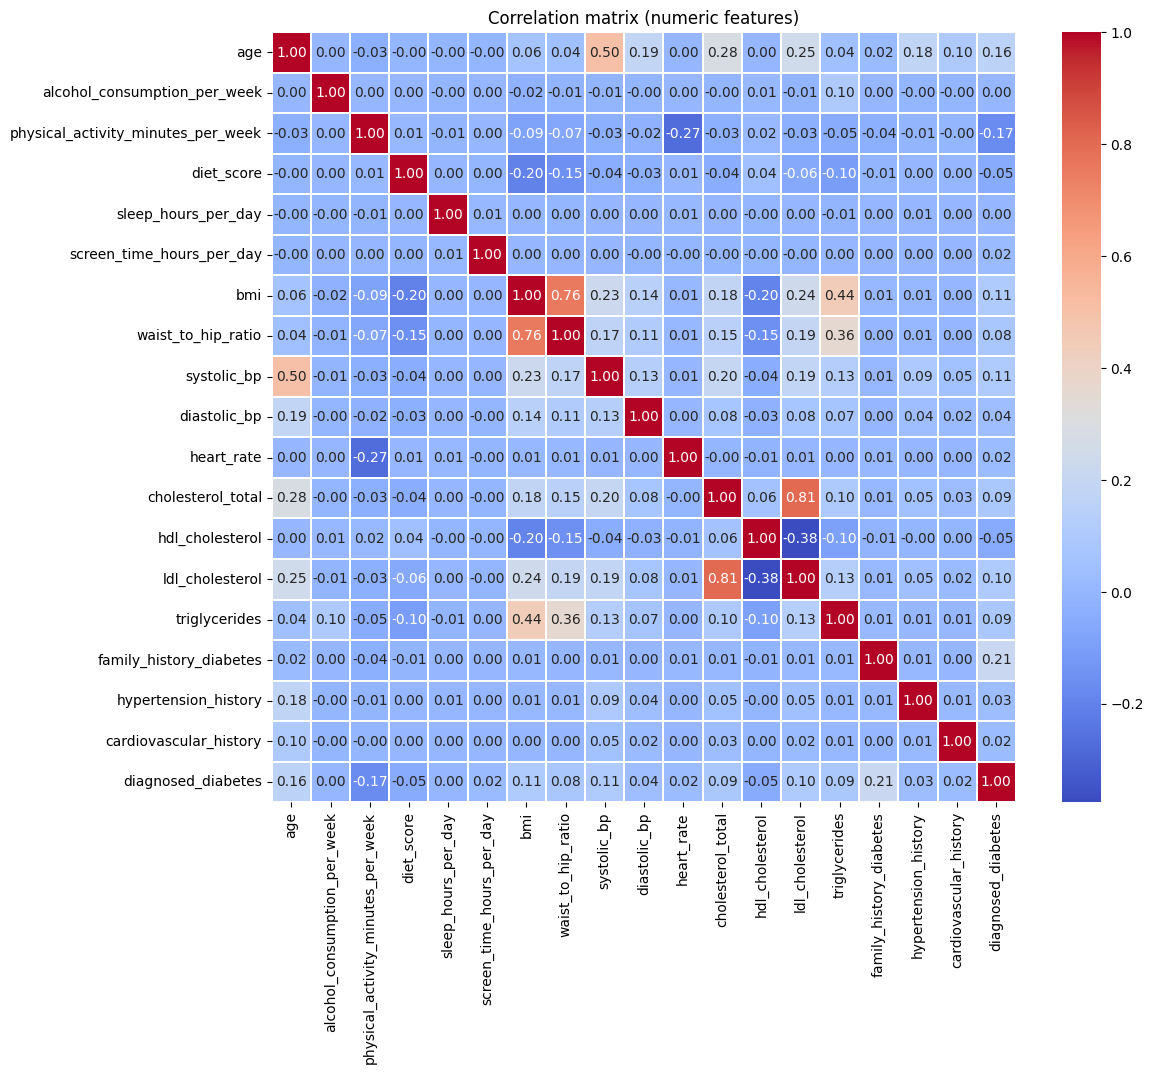

In [8]:
numeric = train.select_dtypes(include=[np.number])

if 'id' in numeric.columns:
    numeric = numeric.drop(columns=['id'])

plt.figure(figsize=(12,10))
sns.heatmap(numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.2)
plt.title("Correlation matrix (numeric features)")
plt.show()

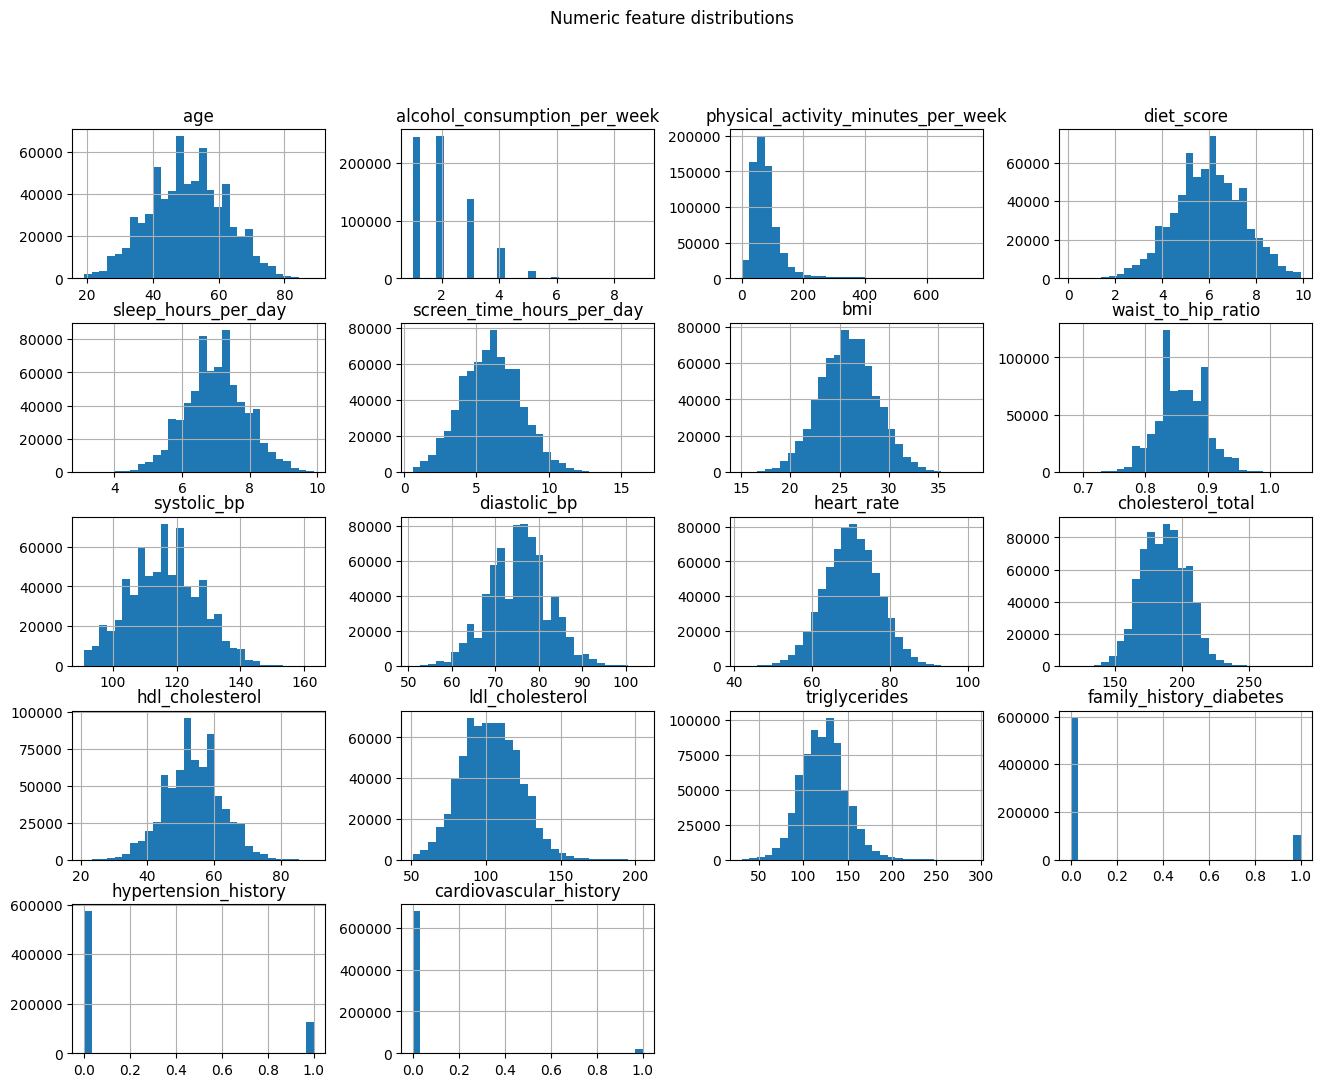

In [9]:
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
# remove id and target
for drop_col in ['id','diagnosed_diabetes']:
    if drop_col in num_cols:
        num_cols.remove(drop_col)

train[num_cols].hist(figsize=(16,12), bins=30)
plt.suptitle("Numeric feature distributions")
plt.show()

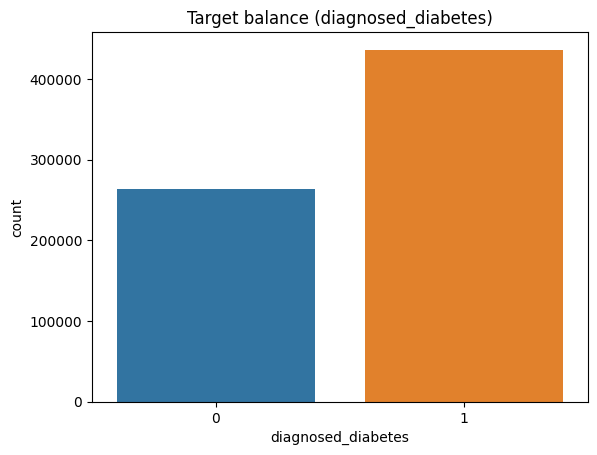

In [10]:
train['diagnosed_diabetes_int'] = train['diagnosed_diabetes'].astype(int)
sns.countplot(x='diagnosed_diabetes_int', data=train)
plt.title("Target balance (diagnosed_diabetes)")
plt.xlabel("diagnosed_diabetes")
plt.show()

train.drop(columns=['diagnosed_diabetes_int'], inplace=True)

In [11]:
# List categorical columns
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
cat_cols

['gender',
 'ethnicity',
 'education_level',
 'income_level',
 'smoking_status',
 'employment_status']

In [12]:
# Fill any missing categorical values (just in case)
train[cat_cols] = train[cat_cols].fillna('Missing')
test[cat_cols] = test[cat_cols].fillna('Missing')

# Combine train (excluding target) and test so get_dummies creates identical columns
train_features = train.drop(columns=['diagnosed_diabetes'])  # keep id
combined = pd.concat([train_features, test], axis=0, ignore_index=True)

# One-hot encode categorical cols (drop_first to reduce col count)
combined = pd.get_dummies(combined, columns=cat_cols, drop_first=True)

# Split back
n_train = train.shape[0]
train_processed = combined.iloc[:n_train, :].reset_index(drop=True)
test_processed = combined.iloc[n_train:, :].reset_index(drop=True)

# Sanity check
print("Train processed shape:", train_processed.shape)
print("Test processed shape:", test_processed.shape)

Train processed shape: (700000, 37)
Test processed shape: (300000, 37)


In [13]:
train_ids = train_processed['id'].copy()
test_ids  = test_processed['id'].copy()

# Drop id before modeling
X_all = train_processed.drop(columns=['id'])
X_test = test_processed.drop(columns=['id'])

# target
y = train['diagnosed_diabetes'].astype(int)  # convert to int (0/1)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_all, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_val shape:  ", X_val.shape)

X_train shape: (560000, 36)
X_val shape:   (140000, 36)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

In [15]:
target = "diagnosed_diabetes"
cat_cols = ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']

X = train.drop(columns=[target])
y = train[target].astype(int)

X_test = test.copy()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
cat_cols = ['gender', 'ethnicity', 'education_level', 'income_level', 
            'smoking_status', 'employment_status']

for col in cat_cols:
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)

In [18]:
cat_idx = [train.columns.get_loc(col) for col in cat_cols]
cat_idx

[16, 17, 18, 19, 20, 21]

# Feature engineering block

In [19]:
tr = train.copy()
te = test.copy()

In [20]:
# list of original categorical cols (from earlier)
cat_cols = ['gender', 'ethnicity', 'education_level', 'income_level',
            'smoking_status', 'employment_status']

In [21]:
# Ensure categorical columns are strings
for c in cat_cols:
    tr[c] = tr[c].astype(str)
    te[c] = te[c].astype(str)

1) Basic derived numeric features

In [22]:
# BMI squared & interaction
for df in (tr, te):
    df['bmi_sq'] = df['bmi'] ** 2
    df['bmi_log'] = np.log1p(df['bmi'])
    df['age_bmi'] = df['age'] * df['bmi']
    df['age_activity'] = df['age'] * df['physical_activity_minutes_per_week']
    df['bmi_activity'] = df['bmi'] * df['physical_activity_minutes_per_week']
    df['waisthip_bmi'] = df['waist_to_hip_ratio'] * df['bmi']

In [23]:
# --- Safe cholesterol ratios (no chained assignment warnings) ---
import numpy as np

for df in (tr, te):
    # safe divide: replace 0 with NaN on denominator first (returns a series)
    denom = df['hdl_cholesterol'].replace(0, np.nan)

    # compute ratios and assign directly (no inplace on a slice)
    df['ldl_hdl'] = df['ldl_cholesterol'] / denom
    df['tg_hdl']  = df['triglycerides'] / denom
    df['chol_tot_to_hdl'] = df['cholesterol_total'] / denom

    # replace infinities with NaN and assign back using .loc to avoid chained assignment
    df.loc[:, 'ldl_hdl'] = df['ldl_hdl'].replace([np.inf, -np.inf], np.nan)
    df.loc[:, 'tg_hdl']  = df['tg_hdl'].replace([np.inf, -np.inf], np.nan)
    df.loc[:, 'chol_tot_to_hdl'] = df['chol_tot_to_hdl'].replace([np.inf, -np.inf], np.nan)

# Fill NaNs from train median (compute median from tr, then fill both sets)
for col in ['ldl_hdl', 'tg_hdl', 'chol_tot_to_hdl']:
    med = tr[col].median(skipna=True)
    tr.loc[:, col] = tr[col].fillna(med)
    te.loc[:, col] = te[col].fillna(med)

In [24]:
# Fill small number of NaNs from divisions with median of train
for col in ['ldl_hdl', 'tg_hdl', 'chol_tot_to_hdl']:
    med = tr[col].median(skipna=True)
    # assign back explicitly to avoid chained-assignment warnings
    tr.loc[:, col] = tr[col].fillna(med)
    te.loc[:, col] = te[col].fillna(med)

In [25]:
# log transform skewed numeric features
skew_cols = ['triglycerides', 'waist_to_hip_ratio', 'screen_time_hours_per_day', 'alcohol_consumption_per_week']
for df in (tr, te):
    for c in skew_cols:
        df[f'log1p_{c}'] = np.log1p(df[c].clip(lower=0))

In [26]:
# comorbidity count
for df in (tr, te):
    df['comorbidity_count'] = (df['family_history_diabetes'].fillna(0).astype(int) +
                               df['hypertension_history'].fillna(0).astype(int) +
                               df['cardiovascular_history'].fillna(0).astype(int))

2) Binned / categorical engineered features (keep as strings)

In [27]:
# Age groups
age_bins = [0, 30, 45, 60, 150]
age_labels = ['<=30', '31-45', '46-60', '60+']
for df in (tr, te):
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels).astype(str)

In [28]:
# BMI categories (WHO-ish)
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['underweight', 'normal', 'overweight', 'obese']
for df in (tr, te):
    df['bmi_cat'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels).astype(str)

In [29]:
# Activity level
act_bins = [-1, 150, 300, 10**6]  # <150 low, 150-300 moderate, >300 high
act_labels = ['sedentary', 'moderate', 'active']
for df in (tr, te):
    df['activity_level'] = pd.cut(df['physical_activity_minutes_per_week'],
                                  bins=act_bins, labels=act_labels).astype(str)

In [30]:
# Alcohol consumption categories
alc_bins = [-1, 0, 7, 14, 10**6]  # abstainer, light, moderate, heavy
alc_labels = ['abstain', 'light', 'moderate', 'heavy']
for df in (tr, te):
    df['alcohol_cat'] = pd.cut(df['alcohol_consumption_per_week'], bins=alc_bins, labels=alc_labels).astype(str)

In [31]:
# Sleep quality: optimal 7-9
for df in (tr, te):
    df['sleep_cat'] = pd.cut(df['sleep_hours_per_day'], bins=[-1,6.5,9.5,24], labels=['short','optimal','long']).astype(str)

In [32]:
# Screen time bucket
for df in (tr, te):
    df['screen_cat'] = pd.cut(df['screen_time_hours_per_day'], bins=[-1,2,5,24], labels=['low','medium','high']).astype(str)

In [33]:
# Waist/hip buckets
for df in (tr, te):
    df['waisthip_bin'] = pd.cut(df['waist_to_hip_ratio'], bins=[-1,0.8,0.95,10], labels=['low','moderate','high']).astype(str)

In [34]:
# Blood pressure categories (systolic focus simple)
for df in (tr, te):
    df['bp_cat'] = pd.cut(df['systolic_bp'], bins=[0,120,129,139,1000], labels=['normal','elevated','stage1','stage2']).astype(str)

In [35]:
# Cholesterol high flag
for df in (tr, te):
    df['high_chol_flag'] = (df['cholesterol_total'] >= 240).astype(int)

In [36]:
# Create some boolean flags as strings (so CatBoost can use them as categorical if helpful)
for df in (tr, te):
    df['is_smoker'] = (df['smoking_status'].str.lower().isin(['current','yes','smoker','smokes'])).astype(int).astype(str)
    df['has_family_history'] = (df['family_history_diabetes'] == 1).astype(int).astype(str)
    df['has_hypertension'] = (df['hypertension_history'] == 1).astype(int).astype(str)

3) Interaction features / ratios (more)

In [37]:
for df in (tr, te):
    df['systolic_age_ratio'] = df['systolic_bp'] / df['age'].replace(0, np.nan)
    df['hdl_to_ldl'] = df['hdl_cholesterol'] / df['ldl_cholesterol'].replace(0, np.nan)
    df['activity_per_bmi'] = df['physical_activity_minutes_per_week'] / df['bmi'].replace(0, np.nan)
    df['sleep_per_activity'] = df['sleep_hours_per_day'] / (1 + df['physical_activity_minutes_per_week'])

# Now clean infinities and NaNs safely
cols_to_fix = ['systolic_age_ratio', 'hdl_to_ldl', 'activity_per_bmi', 'sleep_per_activity']

for col in cols_to_fix:
    med = tr[col].median(skipna=True)

    tr.loc[:, col] = (
        tr[col]
        .replace([np.inf, -np.inf], np.nan)
        .fillna(med)
    )

    te.loc[:, col] = (
        te[col]
        .replace([np.inf, -np.inf], np.nan)
        .fillna(med)
    )

4) Final cleanup: ensure same columns exist, preserve id

In [38]:
train_id = tr['id'].copy()
test_id  = te['id'].copy()

In [39]:
# Drop nothing yet — create X, y
y = tr['diagnosed_diabetes'].astype(int)
X = tr.drop(columns=['diagnosed_diabetes', 'id']).reset_index(drop=True)
X_test = te.drop(columns=['id']).reset_index(drop=True)

# Build final categorical column list for CatBoost: original categorical + engineered categorical
engineered_cat = ['age_group','bmi_cat','activity_level','alcohol_cat','sleep_cat',
                  'screen_cat','waisthip_bin','bp_cat','is_smoker','has_family_history','has_hypertension']

In [40]:
# verify they exist and cast to str
for c in engineered_cat:
    if c in X.columns:
        X[c] = X[c].astype(str)
        X_test[c] = X_test[c].astype(str)

# final cat cols
cat_cols_final = [c for c in cat_cols + engineered_cat if c in X.columns]

In [41]:
# Print sanity checks
print("X shape:", X.shape)
print("X_test shape:", X_test.shape)
print("y distribution (proportions):")
print(y.value_counts(normalize=True))
print("Final categorical columns used for CatBoost:", cat_cols_final)
print()
display(X.head().T.iloc[:80])  # show features briefly

X shape: (700000, 54)
X_test shape: (300000, 54)
y distribution (proportions):
diagnosed_diabetes
1    0.623296
0    0.376704
Name: proportion, dtype: float64
Final categorical columns used for CatBoost: ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status', 'age_group', 'bmi_cat', 'activity_level', 'alcohol_cat', 'sleep_cat', 'screen_cat', 'waisthip_bin', 'bp_cat', 'is_smoker', 'has_family_history', 'has_hypertension']



,0,1,2,3,4
age,31,50,32,54,54
alcohol_consumption_per_week,1,2,3,3,1
physical_activity_minutes_per_week,45,73,158,77,55
diet_score,7.7,5.7,8.5,4.6,5.7
sleep_hours_per_day,6.8,6.5,7.4,7.0,6.2
screen_time_hours_per_day,6.1,5.8,9.1,9.2,5.1
bmi,33.4,23.8,24.1,26.6,28.8
waist_to_hip_ratio,0.93,0.83,0.83,0.83,0.9
systolic_bp,112,120,95,121,108
diastolic_bp,70,77,89,69,60


In [42]:
# Get CatBoost categorical indices (from X)
cat_idx = [X.columns.get_loc(c) for c in cat_cols_final]
print("Cat feature indices (for CatBoost):", cat_idx)

Cat feature indices (for CatBoost): [15, 16, 17, 18, 19, 20, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49]


In [43]:
# assign back to variables with clear names for next steps
X_fe = X.copy()
X_test_fe = X_test.copy()

# Stratified 5-Fold CatBoost CV

In [44]:
# Stratified 5-Fold CatBoost CV
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier, Pool

# Safety checks
assert 'X_fe' in globals() and 'X_test_fe' in globals() and 'y' in globals() and 'cat_idx' in globals(), \
       "Make sure X_fe, X_test_fe, y, and cat_idx exist (run the FE cell first)."

# Convert to DataFrame to be safe
X = X_fe.reset_index(drop=True).copy()
X_test = X_test_fe.reset_index(drop=True).copy()
y = y.reset_index(drop=True).copy()

# CV params
N_FOLDS = 5
SEED = 42

# Model params (balanced between speed and performance)
cb_params = {
    "iterations": 1800,
    "learning_rate": 0.02,
    "depth": 8,
    "l2_leaf_reg": 8,
    "eval_metric": "Accuracy",
    "loss_function": "Logloss",
    "random_seed": SEED,
    "bagging_temperature": 0.2,
    "border_count": 254,
    "verbose": 200,
    "task_type": "CPU",
    "early_stopping_rounds": 200,
    "use_best_model": True
}

skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=SEED)

oof_preds = np.zeros(X.shape[0], dtype=int)        # integer class preds
oof_proba = np.zeros(X.shape[0], dtype=float)      # for averaging probs if needed
test_proba = np.zeros((X_test.shape[0], N_FOLDS))  # store foldwise test probabilities
fold_scores = []

feature_importances = np.zeros(X.shape[1])

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n--- FOLD {fold} ---")
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Create Pools (CatBoost)
    pool_tr = Pool(X_tr, y_tr, cat_features=cat_idx)
    pool_val = Pool(X_val, y_val, cat_features=cat_idx)

    model = CatBoostClassifier(**cb_params)
    model.fit(pool_tr, eval_set=pool_val)

    # Predict val
    val_pred_proba = model.predict_proba(X_val)[:, 1]
    val_pred = (val_pred_proba >= 0.5).astype(int)

    acc = accuracy_score(y_val, val_pred)
    fold_scores.append(acc)
    print(f"Fold {fold} Accuracy: {acc:.6f}")

    # store OOF predictions
    oof_preds[val_idx] = val_pred
    oof_proba[val_idx] = val_pred_proba

    # Predict on test (probabilities)
    test_proba[:, fold-1] = model.predict_proba(X_test)[:, 1]

    # accumulate feature importances (using shap or prediction values; model.get_feature_importance returns float)
    try:
        fi = model.get_feature_importance(pool=Pool(X_tr, y_tr, cat_features=cat_idx), type='FeatureImportance')
    except Exception:
        fi = model.get_feature_importance(type='FeatureImportance')
    feature_importances += fi


--- FOLD 1 ---
0:	learn: 0.6587250	test: 0.6603857	best: 0.6603857 (0)	total: 1.08s	remaining: 32m 28s
200:	learn: 0.6694125	test: 0.6709643	best: 0.6709929 (198)	total: 2m 55s	remaining: 23m 13s
400:	learn: 0.6731071	test: 0.6740929	best: 0.6740929 (400)	total: 5m 40s	remaining: 19m 48s
600:	learn: 0.6761357	test: 0.6766286	best: 0.6766286 (600)	total: 8m 28s	remaining: 16m 54s
800:	learn: 0.6795232	test: 0.6790857	best: 0.6791214 (796)	total: 11m 22s	remaining: 14m 11s
1000:	learn: 0.6820964	test: 0.6807857	best: 0.6808214 (992)	total: 14m 19s	remaining: 11m 25s
1200:	learn: 0.6838911	test: 0.6816429	best: 0.6816857 (1158)	total: 17m 13s	remaining: 8m 35s
1400:	learn: 0.6855143	test: 0.6825643	best: 0.6826643 (1394)	total: 20m 5s	remaining: 5m 43s
1600:	learn: 0.6871411	test: 0.6828571	best: 0.6828857 (1597)	total: 22m 56s	remaining: 2m 51s
1799:	learn: 0.6886554	test: 0.6830786	best: 0.6832857 (1771)	total: 25m 50s	remaining: 0us

bestTest = 0.6832857143
bestIteration = 1771

Shrin

In [45]:
# Overall CV metrics
mean_cv = np.mean(fold_scores)
std_cv = np.std(fold_scores)
print(f"\nMean CV Accuracy: {mean_cv:.6f}  Std: {std_cv:.6f}")

# If you want OOF accuracy on entire training (sanity)
from sklearn.metrics import accuracy_score
oof_acc = accuracy_score(y, oof_preds)
print(f"OOF Accuracy (from combined OOF preds): {oof_acc:.6f}")

# Average test probabilities across folds -> final test preds
test_mean_proba = test_proba.mean(axis=1)
test_pred_final = (test_mean_proba >= 0.5).astype(int)


Mean CV Accuracy: 0.681679  Std: 0.000885
OOF Accuracy (from combined OOF preds): 0.681679


In [46]:
# Feature importance (aggregate)
feature_importances = feature_importances / N_FOLDS
fi_df = pd.DataFrame({
    "feature": X.columns,
    "importance": feature_importances
}).sort_values("importance", ascending=False).reset_index(drop=True)

print("\nTop 30 feature importances:")
display(fi_df.head(30))

# Save OOF + test results
oof_df = pd.DataFrame({
    "id": train_id.reset_index(drop=True),
    "oof_pred": oof_preds,
    "oof_proba": oof_proba,
    "target": y
})
oof_df.to_csv("oof_predictions.csv", index=False)
print("Saved oof_predictions.csv")


Top 30 feature importances:


,feature,importance
0,physical_activity_minutes_per_week,26.824954
1,has_family_history,16.295002
2,family_history_diabetes,14.630439
3,age_bmi,5.718247
4,age,4.281689
5,activity_per_bmi,3.109945
6,triglycerides,2.959925
7,log1p_triglycerides,2.785449
8,cholesterol_total,1.785518
9,heart_rate,1.754585


Saved oof_predictions.csv


In [47]:
submission = pd.DataFrame({
    "id": test_id.reset_index(drop=True),
    "diagnosed_diabetes": test_pred_final.astype(int)
})
submission.to_csv("submission.csv", index=False)
print("Saved submission.csv — ready to upload to Kaggle")

Saved submission.csv — ready to upload to Kaggle


In [48]:
# Quick sanity outputs
print("\nSubmission sample:")
display(submission.head())
print(f"\nTest positive rate (predicted): {submission['diagnosed_diabetes'].mean():.4f}")
print(f"Train target positive rate: {y.mean():.4f}")


Submission sample:


,id,diagnosed_diabetes
0,700000,1
1,700001,1
2,700002,1
3,700003,0
4,700004,1



Test positive rate (predicted): 0.6993
Train target positive rate: 0.6233
